# Used Car Price Prediction Using ML

## Overview
In this project, we aim to build an accurate Machine Learning (ML) model that predicts the prices of used cars based on their specifications. While this may initially sound simple, the real-world applications are highly valuable. Imagine you're part of a car dealership, and a customer walks in asking for the price of a specific car model with certain features. With dozens of models and varying configurations, determining an accurate price on the spot can be challenging.

In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
#importing data with the following url

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'

df = pd.read_csv(url, header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


As we can see the data frame has no headers, therefore we need to input those headers manually. As the data is availabale online as 'Automotive Data set' that can be acess at this link (https://archive.ics.uci.edu/dataset/10/automobile), let's add these headers to our dataframe. 

In [4]:
#adding headers
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
df.columns = headers
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


In [5]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [6]:
#Handling missing values, by repacing '?' with NaN
df.replace('?', np.NaN, inplace = True)
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [7]:
df.shape

(205, 26)

From this we can see that in total 6 column contain missing values, and the data set contain 205 rows. Now, let's replace these missing values with mean or most frequent ones.

In [8]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

As we can see that the data set have some wrong data types, columns 'normalized-losses' should be in integer format but they are in object type, and for columns 'bore', 'stroke', 'horepower', 'peak-rpm' and 'price' should be in float type but they are also in object type, so let's cahnge them.

In [9]:
# List of columns to convert
columns_to_convert = ['normalized-losses', 'price', 'bore', 'stroke', 'horsepower', 'peak-rpm']

# Convert to numeric (float), errors='coerce' will turn invalid parsing into NaN
for col in columns_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')

print(df.dtypes)

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object


For columns 'normalised-losses', 'bore', 'stroke', 'horsepower' and peak-rpm' let's repalce the missing values with the mean values. For the column 'no-of-doors' let's replace with missing values, and for the column 'price' let's drop out the rows with missing values as price is the target column and replacing values will affect our model.

In [10]:
#Handling missing values
# 1. Replace missing values with mean for selected columns
mean_fill_cols = ['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm']
for col in mean_fill_cols:
    df[col].fillna(df[col].mean(), inplace=True)

# 2. Replace missing values in 'num-of-doors' with most frequent value (mode)
df['num-of-doors'].fillna(df['num-of-doors'].mode()[0], inplace=True)

# 3. Drop rows where 'price' is missing
df.dropna(subset=['price'], inplace=True)


print("Missing values after handling:")
print(df.isnull().sum())

Missing values after handling:
symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64


In [11]:
# Statistical Summary
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,3.330692,3.256874,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353
std,1.254802,31.99625,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,0.268072,0.316048,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342
min,-2.000000,65.00000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.00000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,122.00000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000
75%,2.000000,137.00000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.00000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


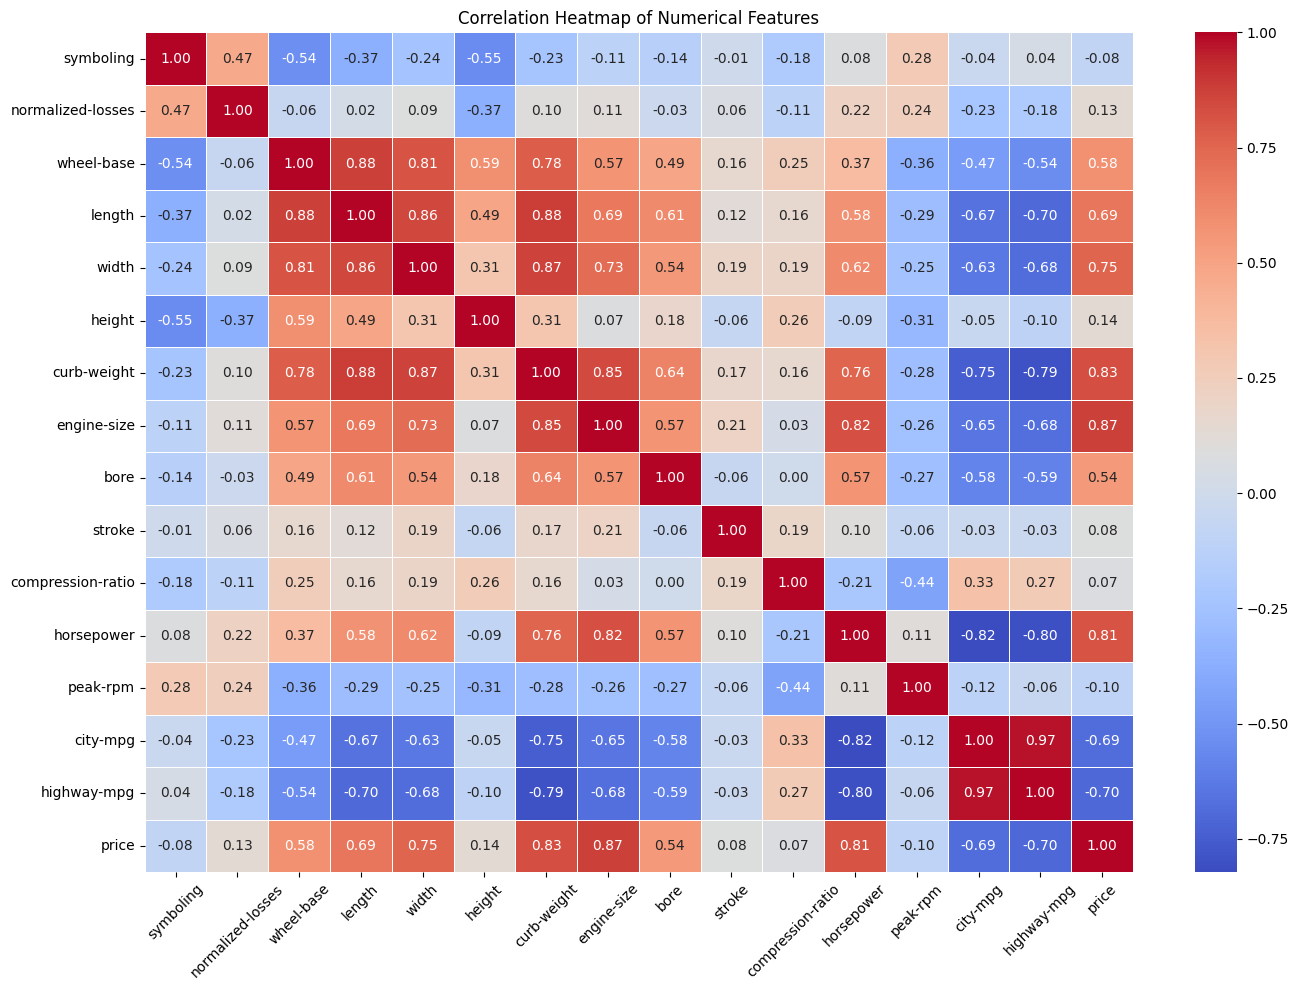

In [12]:
# Correlation heat map
# Calculate the correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Set up the figure
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [13]:
df.describe(include = 'object')

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,201,201,201,201,201,201,201,201,201,201
unique,22,2,2,2,5,3,2,6,7,8
top,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,32,181,165,115,94,118,198,145,157,92


### Data Visualization

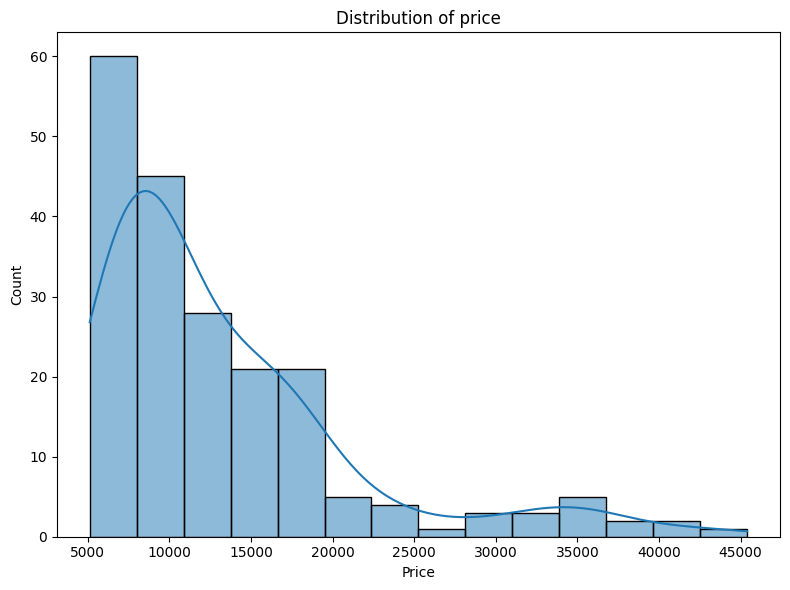

In [14]:
plt.figure(figsize=(8, 6))
sns.histplot(df['price'], kde=True)
plt.title(f'Distribution of price')
plt.xlabel('Price')
plt.tight_layout()
plt.show()

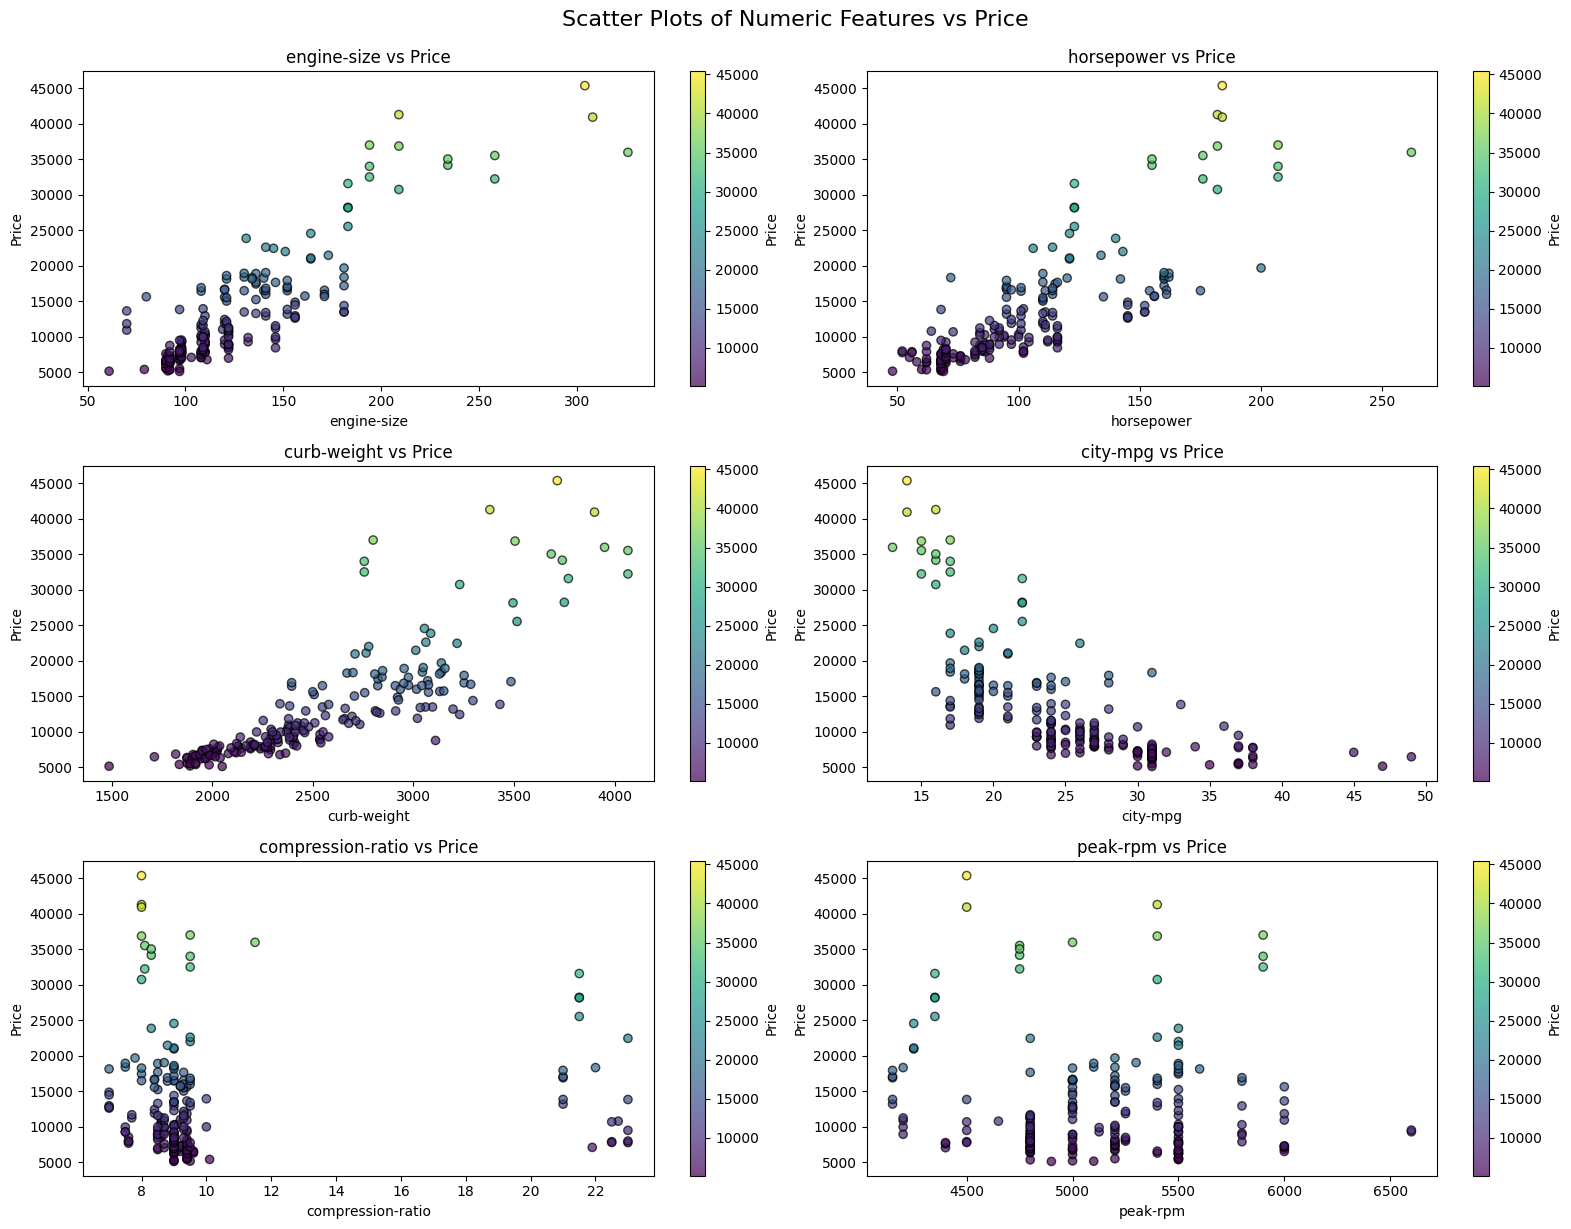

In [15]:
#scatterplots for the distribution of features against prices 
# Select numeric features to plot against price
numeric_cols = ['engine-size', 'horsepower', 'curb-weight', 'city-mpg', 'compression-ratio', 'peak-rpm']

# Set figure size
plt.figure(figsize=(16, 12))

# Loop through features to create subplots
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 2, i + 1)
    scatter = plt.scatter(df[col], df['price'], c=df['price'], cmap='viridis', edgecolor='k', alpha=0.7)
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.title(f'{col} vs Price')
    plt.colorbar(scatter, label='Price')  # Add color bar to indicate price scale
    plt.tight_layout()

plt.suptitle('Scatter Plots of Numeric Features vs Price', fontsize=16, y=1.02)
plt.show()

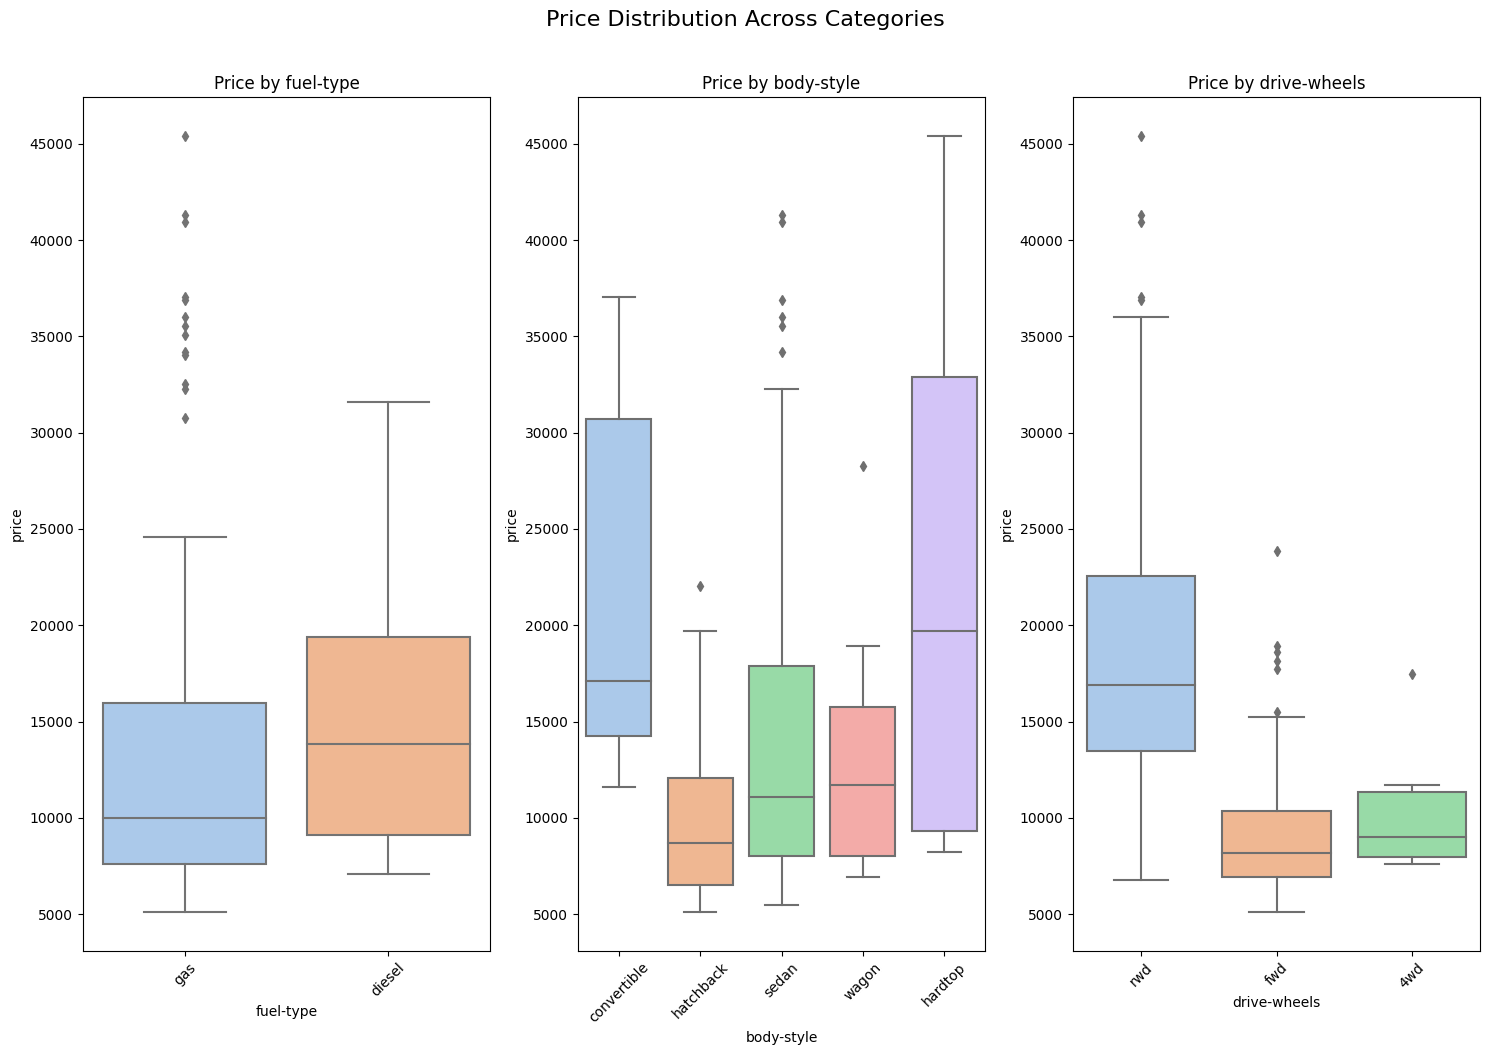

In [16]:
#Box plot price distribution for categorical features
plt.figure(figsize=(15, 10))

for i, col in enumerate(['fuel-type', 'body-style', 'drive-wheels']):
    plt.subplot(1, 3, i+1)
    sns.boxplot(data=df, x=col, y='price', palette='pastel')
    plt.title(f'Price by {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.suptitle('Price Distribution Across Categories', fontsize=16, y=1.05)
plt.show()

After analyzing the price distribution for key categorical features—**fuel type**, **body style**, and **drive wheels**—several observations were made:

- **Fuel Type**: Gas-powered cars dominate the dataset and exhibit a wide price range with several outliers.
- **Body Style**: Sedans are the most common and also show a high number of price outliers.
- **Drive Wheels**: Both FWD and EWD vehicles show scattered price values, again with visible outliers.

These findings highlight the need to address outliers in the dataset, particularly in the `price` column, to prevent distortion in machine learning models.

**Outlier Handling**: Extreme values in the `price` column were removed using the Interquartile Range (IQR) method to improve model stability. **Categorical Encoding**: Non-numeric features such as `fuel-type`, `body-style`, and `drive-wheels` were converted using one-hot encoding to prepare the data for modeling. These preprocessing steps are crucial to ensure accurate and unbiased model training.

In [17]:
# Detect and remove extreme price outliers

"""This will remove rows where price is extremely high or low across any category (not just fuel type or body style),
helping you prevent model distortion."""

Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the dataset
df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]
df.shape

(187, 26)

In [18]:
# Separate target variable
y = df['price']
X = df.drop('price', axis=1)

# Identify numeric and categorical columns
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

In [19]:
from sklearn.preprocessing import OneHotEncoder

# One-hot encode the categorical columns
X_encoded = pd.get_dummies(X[categorical_cols], drop_first=True)

# Combine numeric and encoded categorical features
X_final = pd.concat([X[numeric_cols], X_encoded], axis=1)


In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_final)

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [22]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np

models = {
    'Linear Regression': LinearRegression(),
    'Polynomial (Deg=2)': make_pipeline(PolynomialFeatures(2), LinearRegression()),
    'Polynomial (Deg=3)': make_pipeline(PolynomialFeatures(3), LinearRegression()),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'SVR': SVR()
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    results.append({
        'Model': name,
        'R2 Score': r2,
        'MAE': mae,
        'RMSE': rmse
    })

results_df = pd.DataFrame(results).sort_values(by='R2 Score', ascending=False)
print(results_df)

                Model      R2 Score           MAE          RMSE
3    Ridge Regression  8.797688e-01  1.374886e+03  1.633919e+03
8            AdaBoost  8.616969e-01  1.258984e+03  1.752419e+03
6       Random Forest  8.500778e-01  1.264869e+03  1.824546e+03
7   Gradient Boosting  8.475209e-01  1.305238e+03  1.840040e+03
4    Lasso Regression  8.440617e-01  1.457035e+03  1.860794e+03
0   Linear Regression  8.341434e-01  1.493497e+03  1.919059e+03
5       Decision Tree  7.837417e-01  1.469044e+03  2.191333e+03
9                 SVR -1.834956e-02  3.564467e+03  4.755218e+03
1  Polynomial (Deg=2) -4.285060e+18  5.080238e+12  9.754398e+12
2  Polynomial (Deg=3) -1.643961e+21  1.082581e+14  1.910591e+14


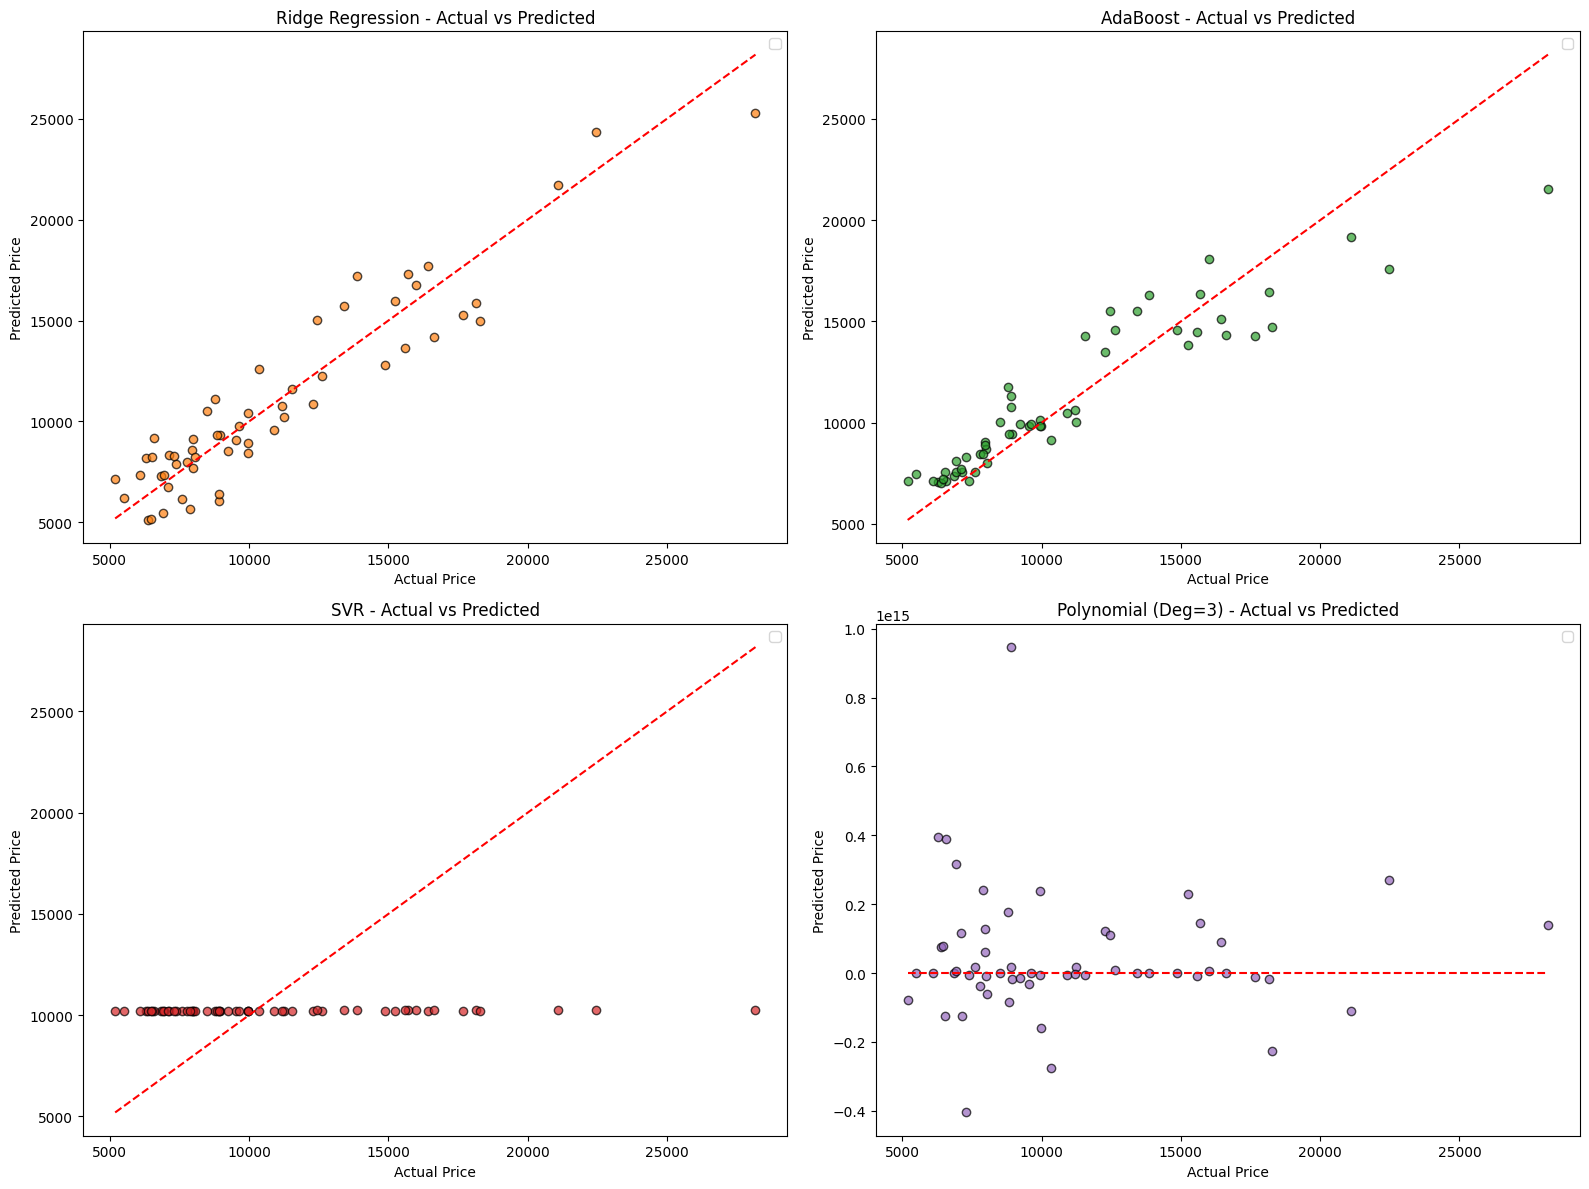

In [26]:
#plot showing actual vs predicted values for top 2 best models and least 2 models for comparision
import matplotlib.pyplot as plt

# Define the selected models again to refit for plotting
selected_models = {
    'Ridge Regression': Ridge(),
    'AdaBoost': AdaBoostRegressor(),
    'SVR': SVR(),
    'Polynomial (Deg=3)': make_pipeline(PolynomialFeatures(3), LinearRegression())
}

# Plotting Actual vs Predicted values
plt.figure(figsize=(16, 12))

for i, (name, model) in enumerate(selected_models.items(), 1):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    plt.subplot(2, 2, i)
    plt.scatter(y_test, y_pred, alpha=0.7, color=plt.cm.tab10(i), edgecolor='k')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.title(f'{name} - Actual vs Predicted')
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.legend()


plt.tight_layout()
plt.show()

## Key Insights
Based on the findings and comprehensive analysis, it was observed that the original dataset comprised 205 rows and 26 columns, representing 205 cars with 26 different specifications. Upon analyzing the price distribution, it was noted that the data was right-skewed, indicating a higher number of low-priced cars compared to expensive ones. Additionally, scatter plots of both numerical and categorical features showed a significant presence of outliers, which could negatively impact model performance. To address this, outliers were treated using the Interquartile Range (IQR) method, which resulted in a reduced dataset of 185 rows. Despite the reduction, this cleaned dataset contained more consistent and evenly distributed price values, contributing to improved model stability.

After preprocessing, including one-hot encoding of categorical variables and standardization of numerical features, the dataset was split into training and testing sets with a 70-30 ratio. Several machine learning models were trained and evaluated for performance. Among these, Ridge Regression and AdaBoost Regressor demonstrated the best results, achieving approximately 87% accuracy (R² score) and comparatively lower MAE and RMSE values. On the other hand, Polynomial Regression (Degree 3) and Support Vector Regressor (SVR) performed poorly, with high errors and low predictive accuracy.

Due to the relatively small size of the dataset, no hyperparameter tuning was applied during model training. This decision was made to avoid the risk of overfitting or underfitting, ensuring that models learned the underlying data patterns without overcomplicating them. Ultimately, Ridge Regression emerged as the most reliable model, offering strong performance and serving as a solid foundation for future expansion as more data becomes available.

In practical application, especially in a used car dealership context, the Ridge Regression model can be effectively used to predict the selling price of a car based on its specifications. This not only aids buyers in making informed decisions but also helps sellers in setting fair and accurate prices.